In [1]:
# 1. Load data
import pandas as pd

dataset = pd.read_csv("/kaggle/input/titanic/train.csv")

In [2]:
# 2. Data preparation
# 2.1. Exploratory data analysis
# 2.1.1. Descriptive

# Review data

dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Review dimension

dataset.shape

(891, 12)

In [4]:
# Review data type

dataset.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
# Summarize data

dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


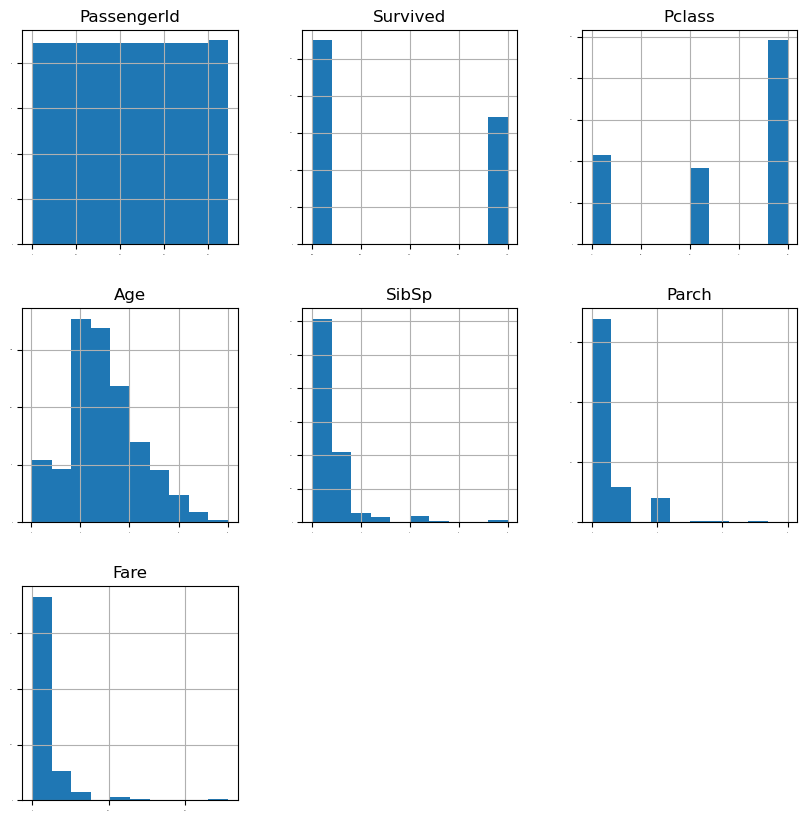

In [6]:
# 2.1.2. Data visualization
# Histogram

from matplotlib import pyplot
dataset.hist(sharex = False, sharey = False, xlabelsize = 1, ylabelsize = 1,\
            figsize = (10,10))
pyplot.show()

In [7]:
# 2.2. Data cleaning
# Handle missing values
# Remove columns that have more than 30% of missing values

# Calculate the percentage of missing data for each feature:
missing_fractions = dataset.isnull().mean().sort_values(ascending=False)

#Drop the missing fraction
drop_list = sorted(list(missing_fractions[missing_fractions > 0.3].index))
dataset.drop(labels = drop_list, axis = 1, inplace = True)
dataset.shape

(891, 11)

In [8]:
# Fill remaining missing values
dataset = dataset.fillna(0)

In [9]:
# Convert categorical variables to dummy variables
dataset = pd.get_dummies(dataset)

In [10]:
# Define X & Y
Y = dataset["Survived"]
X = dataset.loc[:, dataset.columns != "Survived"]

In [11]:
# 2.3. Feature selection
# Select important features for model training
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

bestfeatures = SelectKBest(k = 'all', score_func = chi2)
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] #naming the dataframe columns
featureScores.nlargest(6,'Score').set_index('Specs')

,Score
Specs,
Fare,4518.319091
Sex_female,170.348127
Sex_male,92.702447
Pclass,30.873699
Embarked_C,20.464401
Parch,10.097499


In [12]:
# Define X based on important features

X = dataset[["Fare", "Sex_female", "Sex_male", "Pclass", "Embarked_C",\
             "Parch"]]

In [13]:
# 3. Evaluate data
# Split data into training and test set
from sklearn.model_selection import train_test_split

test_size = 0.2
seed = 42
X_train, X_test, Y_train, Y_test =\
train_test_split(X, Y, test_size = test_size, random_state = seed)

In [14]:
# Train model 
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, Y_train)

RandomForestClassifier()

In [15]:
# Calculate evaluation metric - accuracy
from sklearn.metrics import accuracy_score

# Accuracy on training data
acc_train = accuracy_score(model.predict(X_train), Y_train)

# Accuracy on testing data (unseen data)
acc_test = accuracy_score(model.predict(X_test), Y_test)

print(acc_train)
print(acc_test)

0.9185393258426966
0.7932960893854749


In [16]:
# 4. Predict new data
# Predict on new data
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")

In [17]:
# Check missing values
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [18]:
# Fill missing values and get dummy
test_data = test_data.fillna(0)
test_data=pd.get_dummies(test_data)

In [19]:
# Define test variables according to traning model
test = test_data[["Fare", "Sex_female", "Sex_male", "Pclass", "Embarked_C",\
             "Parch"]]

In [20]:
# Predict Survived on new data
prediction = model.predict(test)

print("The predictions are: \n\n", prediction)

The predictions are: 

 [0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 1 0 1 0 1 0 1 0 1 0 0 0 1 0 1 0 0
 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 1 1 0 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 0 1 1 1 0 0 0 1 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 1 0 0 1 0 0 1 1 0 1 1 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 1 0 1 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 1 0 1 0 1 1 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 1 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 0 1 1
 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 1 0
 0 1 0 1 1 0 0 1 0 0 1]


In [21]:
# Save prediction to csv file
submission_titanic = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': prediction})
submission_titanic.to_csv('submission_titanic.csv', index=False)